
1.   Does increase in stay length cause increase in lead time? (Continous explanatory and response variable
2.   Does reduction in lead time casuses an increase of probability of reservation cancel
3. Does the average daily rate (adr) change between hotel types (Resort hotel and city hotel)


Variables chosen -
1.   Stay length (weekdays + weekends) (numeric)
1.   Lead time (numeric)
1.   adr (numeric)
1.   hotel type (binary)
1.   is_cancel (binary)
1.   is_repeated_guest (binary)
1.   arrival_date_month (categoric)
1.  is parking required (binary)


TODO:
* Sample 10,000 rows

In [40]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('hotel_bookings.csv')

# Remove all duplicate rows
df = df.drop_duplicates()

# Display the number of rows before and after removing duplicates
print(f"Number of rows before removing duplicates: {len(df)}")
print(f"Number of rows after removing duplicates: {len(df_cleaned)}")


df['stay_length'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_parking_required'] = df['required_car_parking_spaces'].apply(lambda x: 1 if x > 0 else 0)
df = df[['stay_length',
                  'lead_time',
                  'adr',
                  'hotel',
                  'is_canceled',
                  'is_repeated_guest',
                  'arrival_date_month',
                  'is_parking_required',
                  ]]

def df_filter_ilegal(df, bound):
    filtered_df = df.copy()
    for column, (lower_bound, upper_bound) in bound.items():
        filtered_df = filtered_df[(filtered_df[column] > lower_bound) & (filtered_df[column] < upper_bound)]
    return filtered_df

bounds = {
    'stay_length': (0, 70),
    'lead_time': (0, 738),
    'adr': (0, 1000),
}

df = df_filter_ilegal(df, bounds)
num_rows = len(df)
print(f"Number of rows: {num_rows}")

Number of rows before removing duplicates: 87396
Number of rows after removing duplicates: 87396
Number of rows: 80164


<ipython-input-40-4899c67b9c55>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-4899c67b9c55>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df_cleaned = df_cleaned[df_cleaned["adr"] >= 1]
df_cleaned = df_cleaned[df_cleaned["adr"] <= 1000]

# Create the plot without manually transforming the 'count' column
fig = px.histogram(df_cleaned, x="adr", title="",
                   labels={"adr": "adr"},
                   nbins=100)
import matplotlib.pyplot as plt
fig.show()

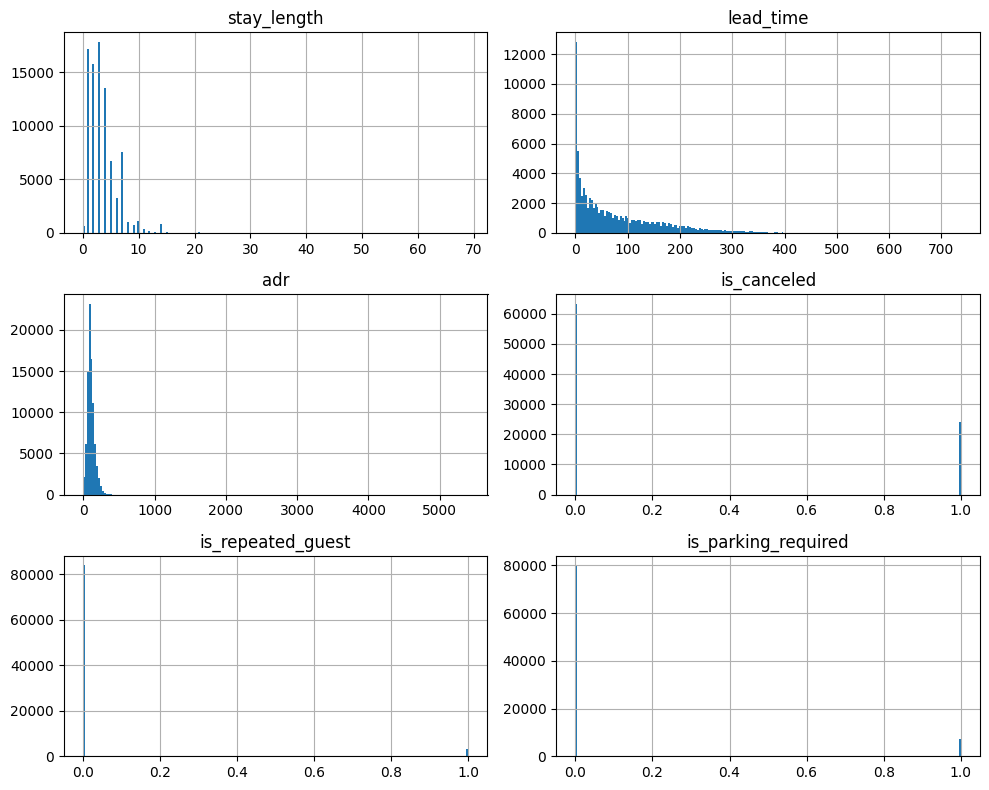

In [29]:
import matplotlib.pyplot as plt

df_filtered.hist(bins=200, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [41]:
# Top 10 and lowest 10 for 'stay_length'
print("Top 10 for 'stay_length':")
print(df['stay_length'].nlargest(10))
print("\nLowest 10 for 'stay_length':")
print(df['stay_length'].nsmallest(10))

# Top 10 and lowest 10 for 'lead_time'
print("\nTop 10 for 'lead_time':")
print(df['lead_time'].nlargest(10))
print("\nLowest 10 for 'lead_time':")
print(df['lead_time'].nsmallest(10))

# Top 10 and lowest 10 for 'adr'
print("\nTop 10 for 'adr':")
print(df['adr'].nlargest(10))
print("\nLowest 10 for 'adr':")
print(df['adr'].nsmallest(10))


# Print unique values for each column
print("Unique values for 'is_cancel':")
print(df['is_canceled'].unique())

print("\nUnique values for 'is_repeated_guest':")
print(df['is_repeated_guest'].unique())

print("\nUnique values for 'arrival_date_month':")
print(df['arrival_date_month'].unique())

print("\nUnique values for 'is_parking_required':")
print(df['is_parking_required'].unique())

Top 10 for 'stay_length':
14038     69
14037     60
101794    57
9839      56
33924     56
32589     45
3820      42
3850      42
34614     42
34898     42
Name: stay_length, dtype: int64

Lowest 10 for 'stay_length':
2     1
3     1
17    1
53    1
54    1
55    1
88    1
89    1
90    1
91    1
Name: stay_length, dtype: int64

Top 10 for 'lead_time':
4182     709
65231    629
65237    629
60173    626
65032    622
65036    622
64762    615
64766    615
64397    608
64400    608
Name: lead_time, dtype: int64

Lowest 10 for 'lead_time':
54     1
55     1
90     1
128    1
212    1
218    1
220    1
330    1
334    1
387    1
Name: lead_time, dtype: int64

Top 10 for 'adr':
15083     508.00
103912    451.50
13142     450.00
13391     437.00
39155     426.25
39568     402.00
39118     397.38
13323     392.00
39517     392.00
13406     388.00
Name: adr, dtype: float64

Lowest 10 for 'adr':
35059    0.26
47427    0.50
47466    1.00
47642    1.00
82659    1.00
82668    1.00
82679    1.00
83

In [42]:
df = df.sample(n=10000, random_state=42)
df.to_csv('sampled_data.csv', index=False)